In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

In [5]:
df = pd.read_csv("data.csv")

In [6]:
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [7]:
df = df.drop('id', axis = 1);
df = df.drop('Unnamed: 32', axis = 1);
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [8]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
diagnosis,M,M,M,M,M,M,M,M,M,M
radius_mean,17.99,20.57,19.69,11.42,20.29,12.45,18.25,13.71,13.0,12.46
texture_mean,10.38,17.77,21.25,20.38,14.34,15.7,19.98,20.83,21.82,24.04
perimeter_mean,122.8,132.9,130.0,77.58,135.1,82.57,119.6,90.2,87.5,83.97
area_mean,1001.0,1326.0,1203.0,386.1,1297.0,477.1,1040.0,577.9,519.8,475.9
smoothness_mean,0.1184,0.08474,0.1096,0.1425,0.1003,0.1278,0.09463,0.1189,0.1273,0.1186
compactness_mean,0.2776,0.07864,0.1599,0.2839,0.1328,0.17,0.109,0.1645,0.1932,0.2396
concavity_mean,0.3001,0.0869,0.1974,0.2414,0.198,0.1578,0.1127,0.09366,0.1859,0.2273
concave points_mean,0.1471,0.07017,0.1279,0.1052,0.1043,0.08089,0.074,0.05985,0.09353,0.08543
symmetry_mean,0.2419,0.1812,0.2069,0.2597,0.1809,0.2087,0.1794,0.2196,0.235,0.203


In [9]:
df.shape

(569, 31)

In [10]:
df.empty

False

In [11]:
df.groupby('diagnosis').mean().T

diagnosis,B,M
radius_mean,12.146524,17.462830
texture_mean,17.914762,21.604906
perimeter_mean,78.075406,115.365377
area_mean,462.790196,978.376415
smoothness_mean,0.092478,0.102898
compactness_mean,0.080085,0.145188
concavity_mean,0.046058,0.160775
concave points_mean,0.025717,0.087990
symmetry_mean,0.174186,0.192909
fractal_dimension_mean,0.062867,0.062680


In [12]:
df.groupby('diagnosis').median().T

diagnosis,B,M
radius_mean,12.200000,17.325000
texture_mean,17.390000,21.460000
perimeter_mean,78.180000,114.200000
area_mean,458.400000,932.000000
smoothness_mean,0.090760,0.102200
compactness_mean,0.075290,0.132350
concavity_mean,0.037090,0.151350
concave points_mean,0.023440,0.086280
symmetry_mean,0.171400,0.189900
fractal_dimension_mean,0.061540,0.061575


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [14]:
# разделяем по целевому признаку для анализа
df_m = df.groupby('diagnosis').get_group('M')
df_b = df.groupby('diagnosis').get_group('B')

In [15]:
df_m.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,212.0,17.462830,3.203971,10.950000,15.075000,17.325000,19.590000,28.11000
texture_mean,212.0,21.604906,3.779470,10.380000,19.327500,21.460000,23.765000,39.28000
perimeter_mean,212.0,115.365377,21.854653,71.900000,98.745000,114.200000,129.925000,188.50000
area_mean,212.0,978.376415,367.937978,361.600000,705.300000,932.000000,1203.750000,2501.00000
smoothness_mean,212.0,0.102898,0.012608,0.073710,0.094010,0.102200,0.110925,0.14470
compactness_mean,212.0,0.145188,0.053987,0.046050,0.109600,0.132350,0.172400,0.34540
concavity_mean,212.0,0.160775,0.075019,0.023980,0.109525,0.151350,0.203050,0.42680
concave points_mean,212.0,0.087990,0.034374,0.020310,0.064620,0.086280,0.103175,0.20120
symmetry_mean,212.0,0.192909,0.027638,0.130800,0.174050,0.189900,0.209850,0.30400
fractal_dimension_mean,212.0,0.062680,0.007573,0.049960,0.056598,0.061575,0.067075,0.09744


In [16]:
df_b.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,357.0,12.146524,1.780512,6.981000,11.080000,12.200000,13.370000,17.85000
texture_mean,357.0,17.914762,3.995125,9.710000,15.150000,17.390000,19.760000,33.81000
perimeter_mean,357.0,78.075406,11.807438,43.790000,70.870000,78.180000,86.100000,114.60000
area_mean,357.0,462.790196,134.287118,143.500000,378.200000,458.400000,551.100000,992.10000
smoothness_mean,357.0,0.092478,0.013446,0.052630,0.083060,0.090760,0.100700,0.16340
compactness_mean,357.0,0.080085,0.033750,0.019380,0.055620,0.075290,0.097550,0.22390
concavity_mean,357.0,0.046058,0.043442,0.000000,0.020310,0.037090,0.059990,0.41080
concave points_mean,357.0,0.025717,0.015909,0.000000,0.015020,0.023440,0.032510,0.08534
symmetry_mean,357.0,0.174186,0.024807,0.106000,0.158000,0.171400,0.189000,0.27430
fractal_dimension_mean,357.0,0.062867,0.006747,0.051850,0.058530,0.061540,0.065760,0.09575


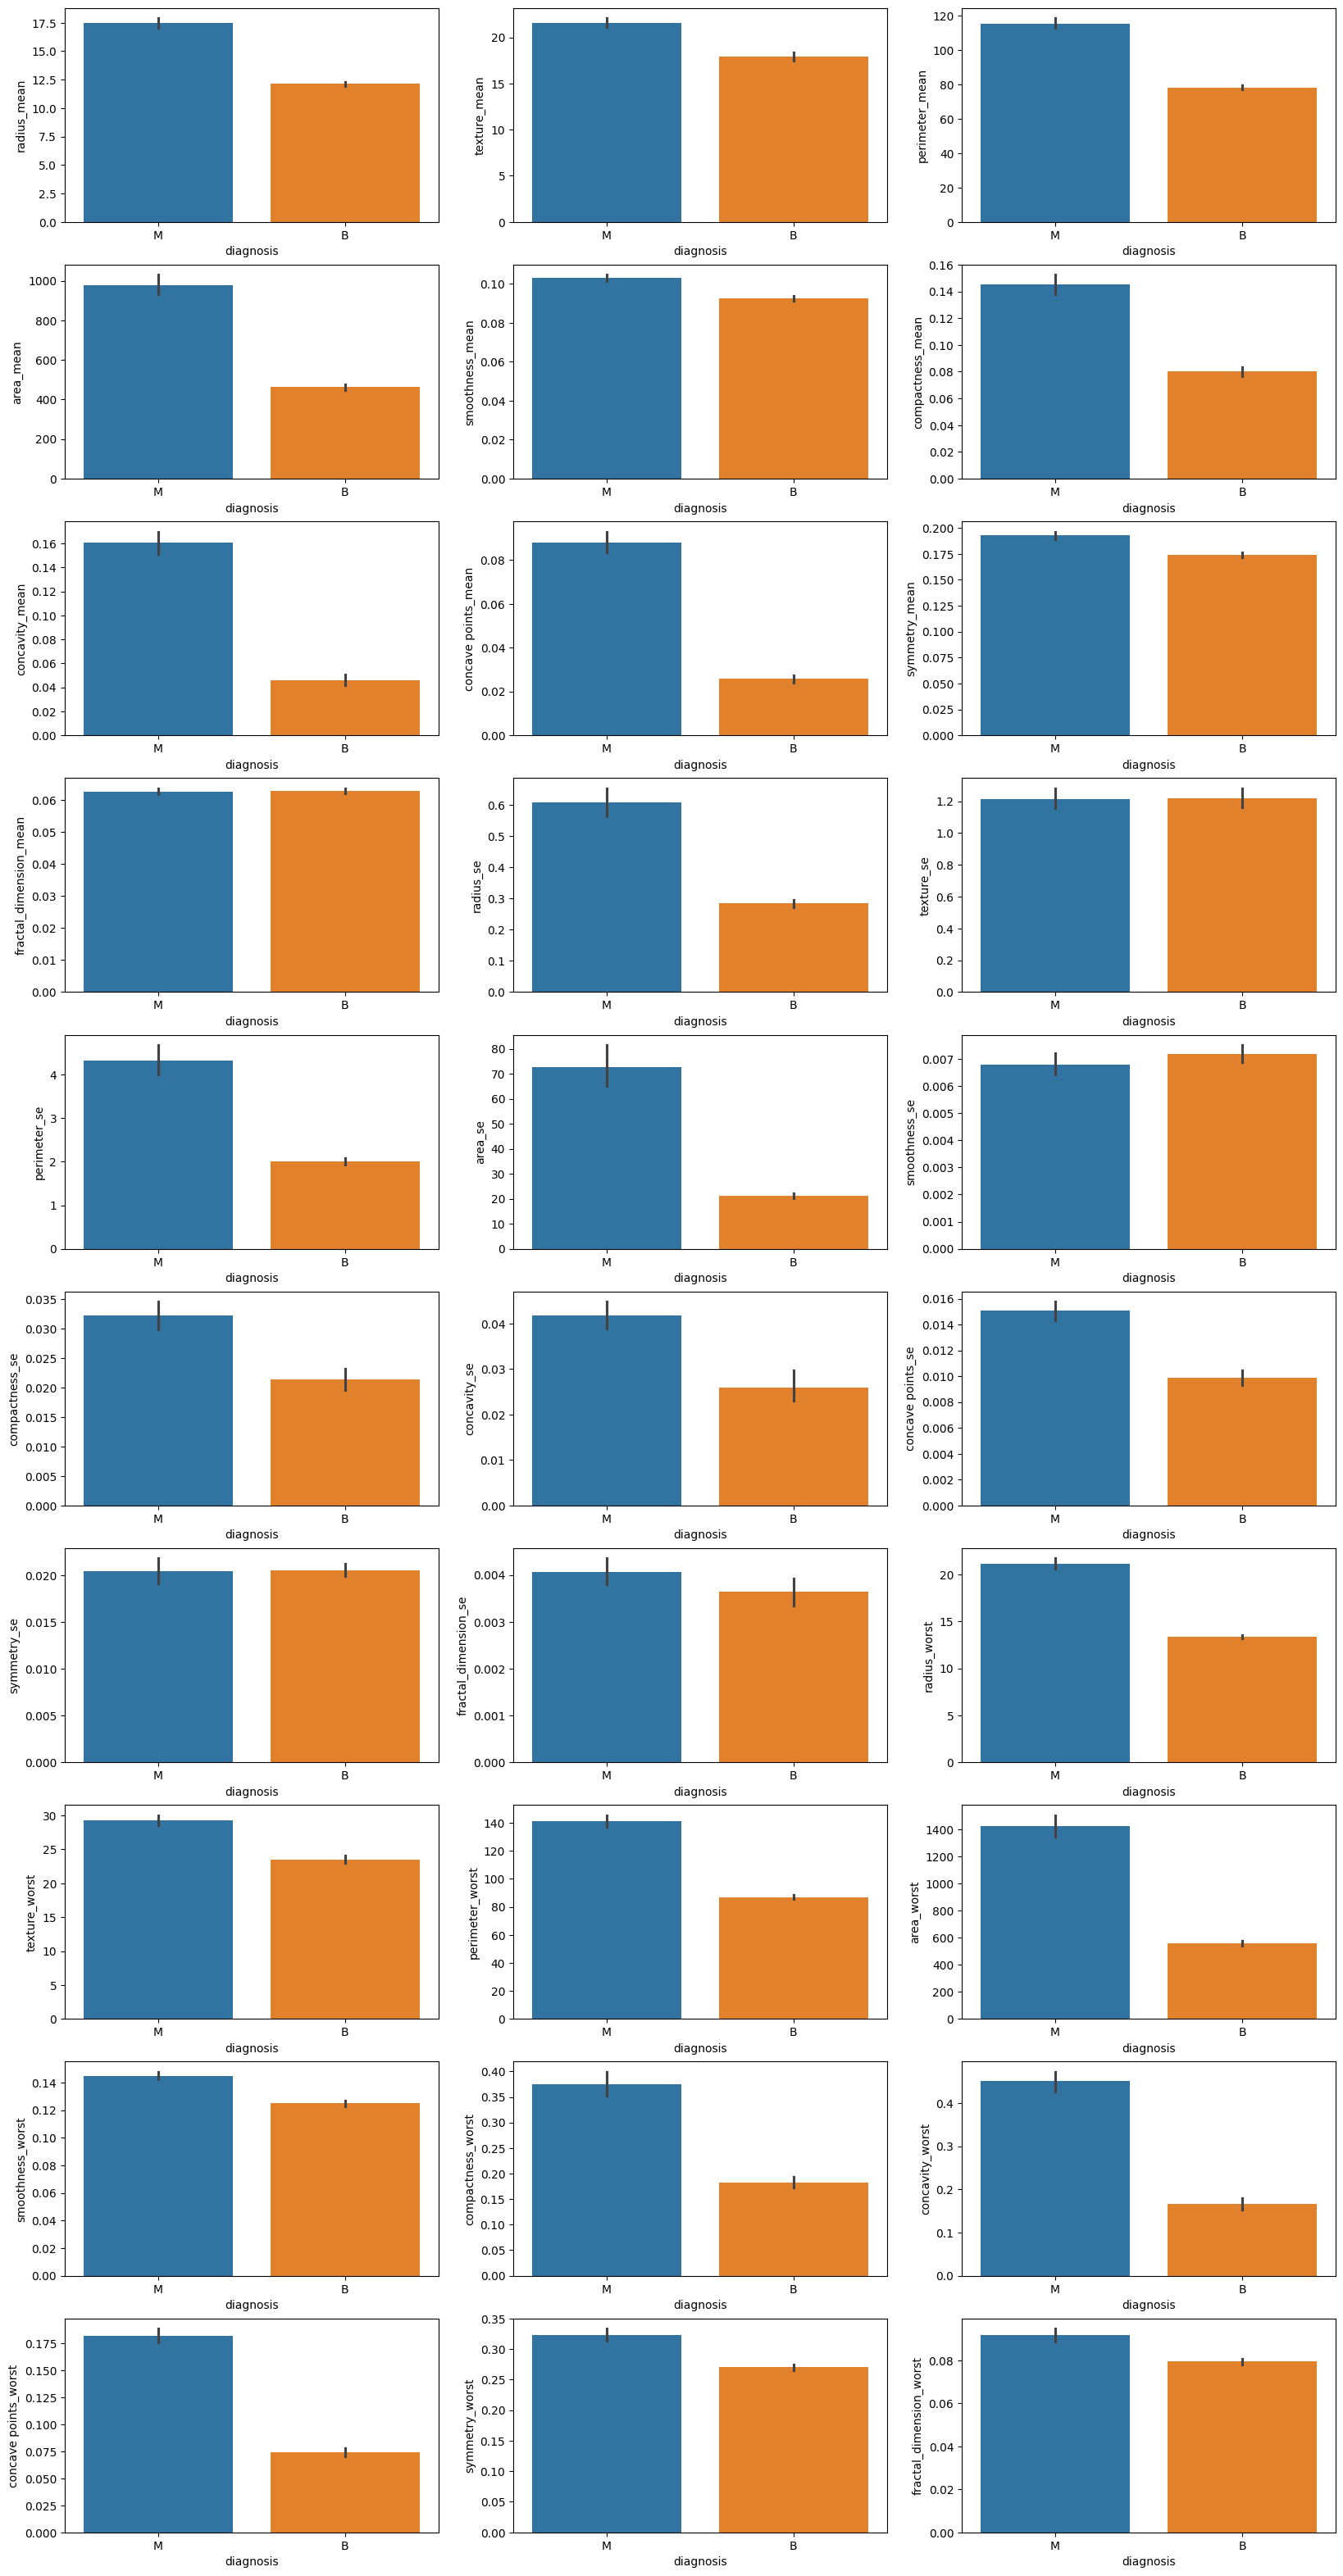

In [17]:
fig, axs = plt.subplots(10, 3, figsize=(20, 40))

columns = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 
           'smoothness_mean', 'compactness_mean', 'concavity_mean', 
           'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
           'radius_se', 'texture_se', 'perimeter_se', 'area_se', 
           'smoothness_se', 'compactness_se', 'concavity_se', 
           'concave points_se', 'symmetry_se', 'fractal_dimension_se',
           'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 
           'smoothness_worst', 'compactness_worst', 'concavity_worst', 
           'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

for i, col in enumerate(columns):
    row = i // 3
    col_idx = i % 3
    sns.barplot(data=df, x='diagnosis', y=col, hue='diagnosis', ax=axs[row, col_idx])

plt.show()

In [18]:
df_cleaned = df
df_cleaned = df_cleaned.replace({'M':1, 'B':0});
df_corr = df_cleaned.corr()
df_corr

C:\Users\AdminTst\AppData\Local\Temp\ipykernel_4204\397339615.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cleaned = df_cleaned.replace({'M':1, 'B':0});


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


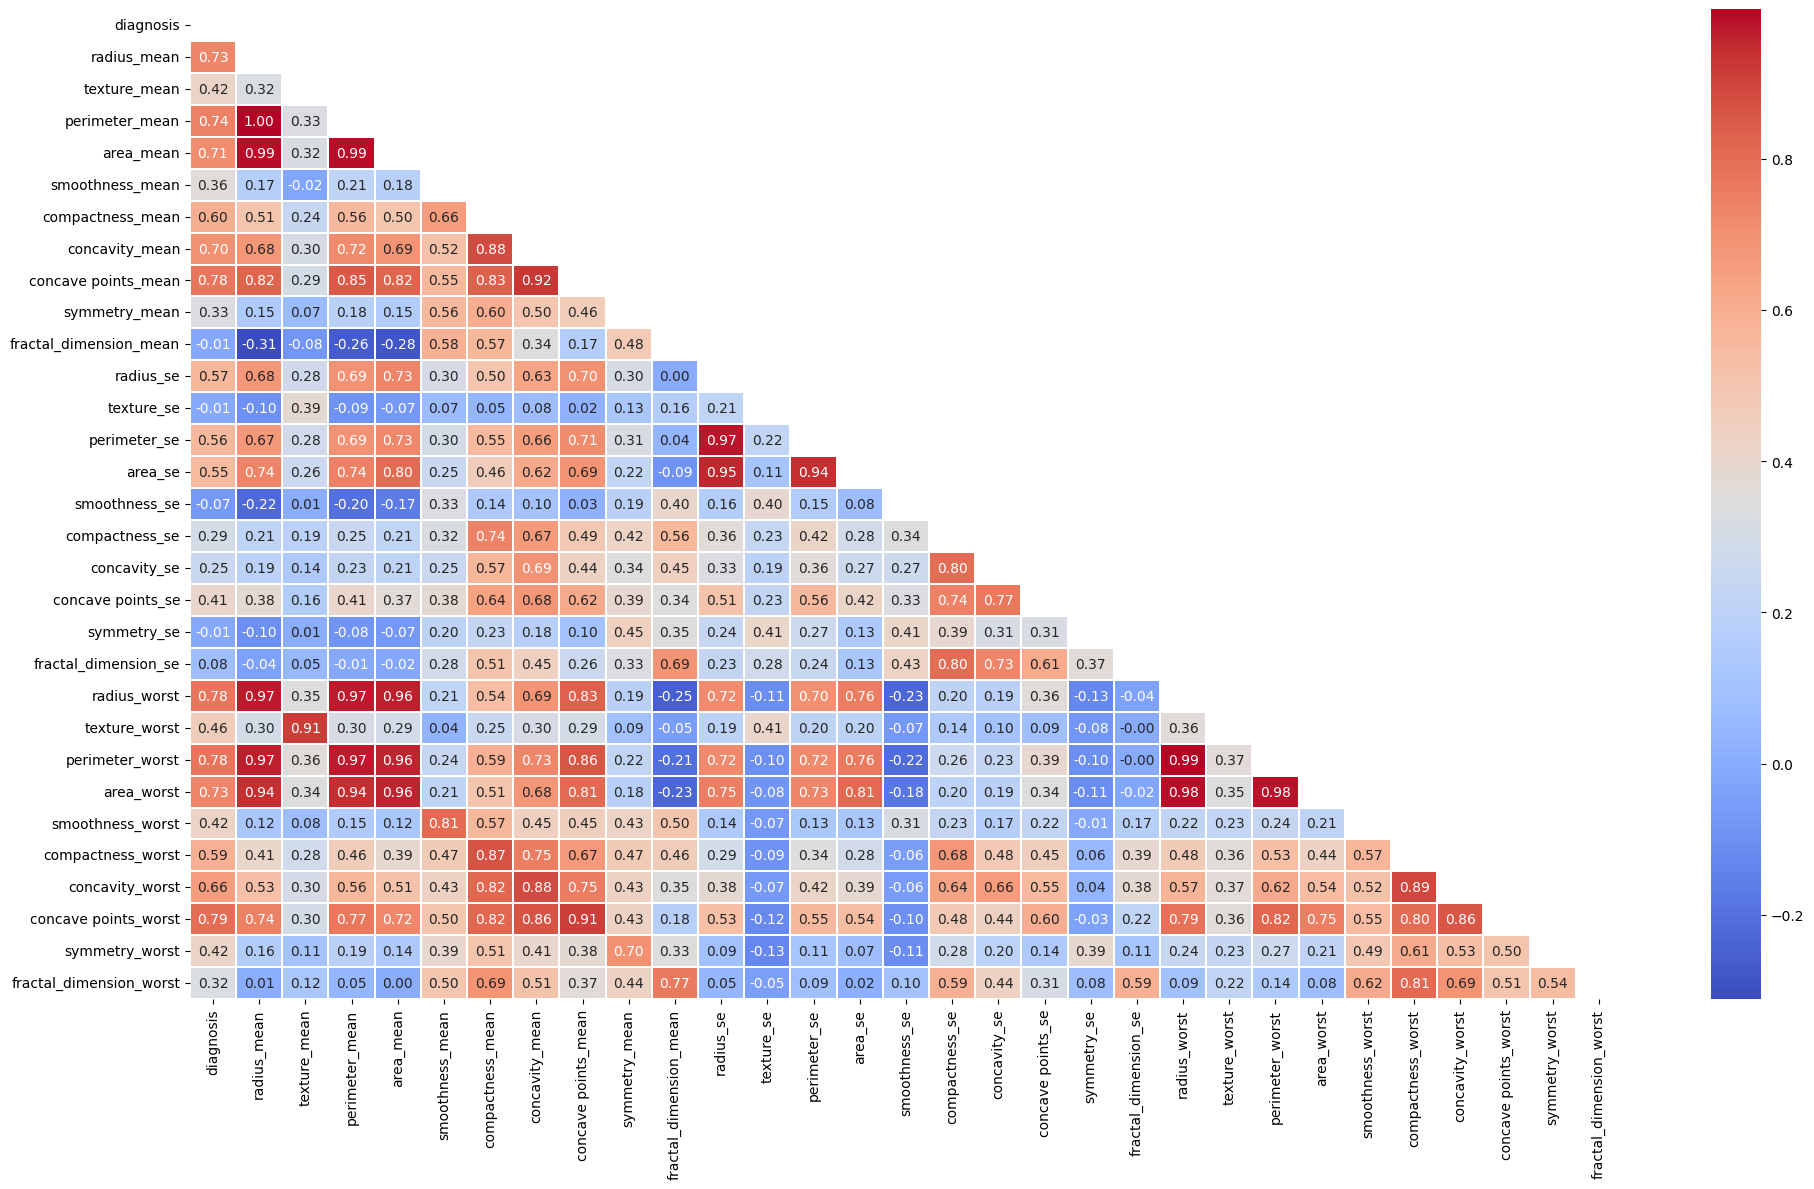

In [19]:
plt.figure(figsize=(20,12))
sns.heatmap(df_corr, linewidths=0.1, annot=True, fmt = ".2f", cmap = 'coolwarm', mask = np.triu(np.ones_like(df_corr, dtype=bool)))
plt.tight_layout()
plt.show()

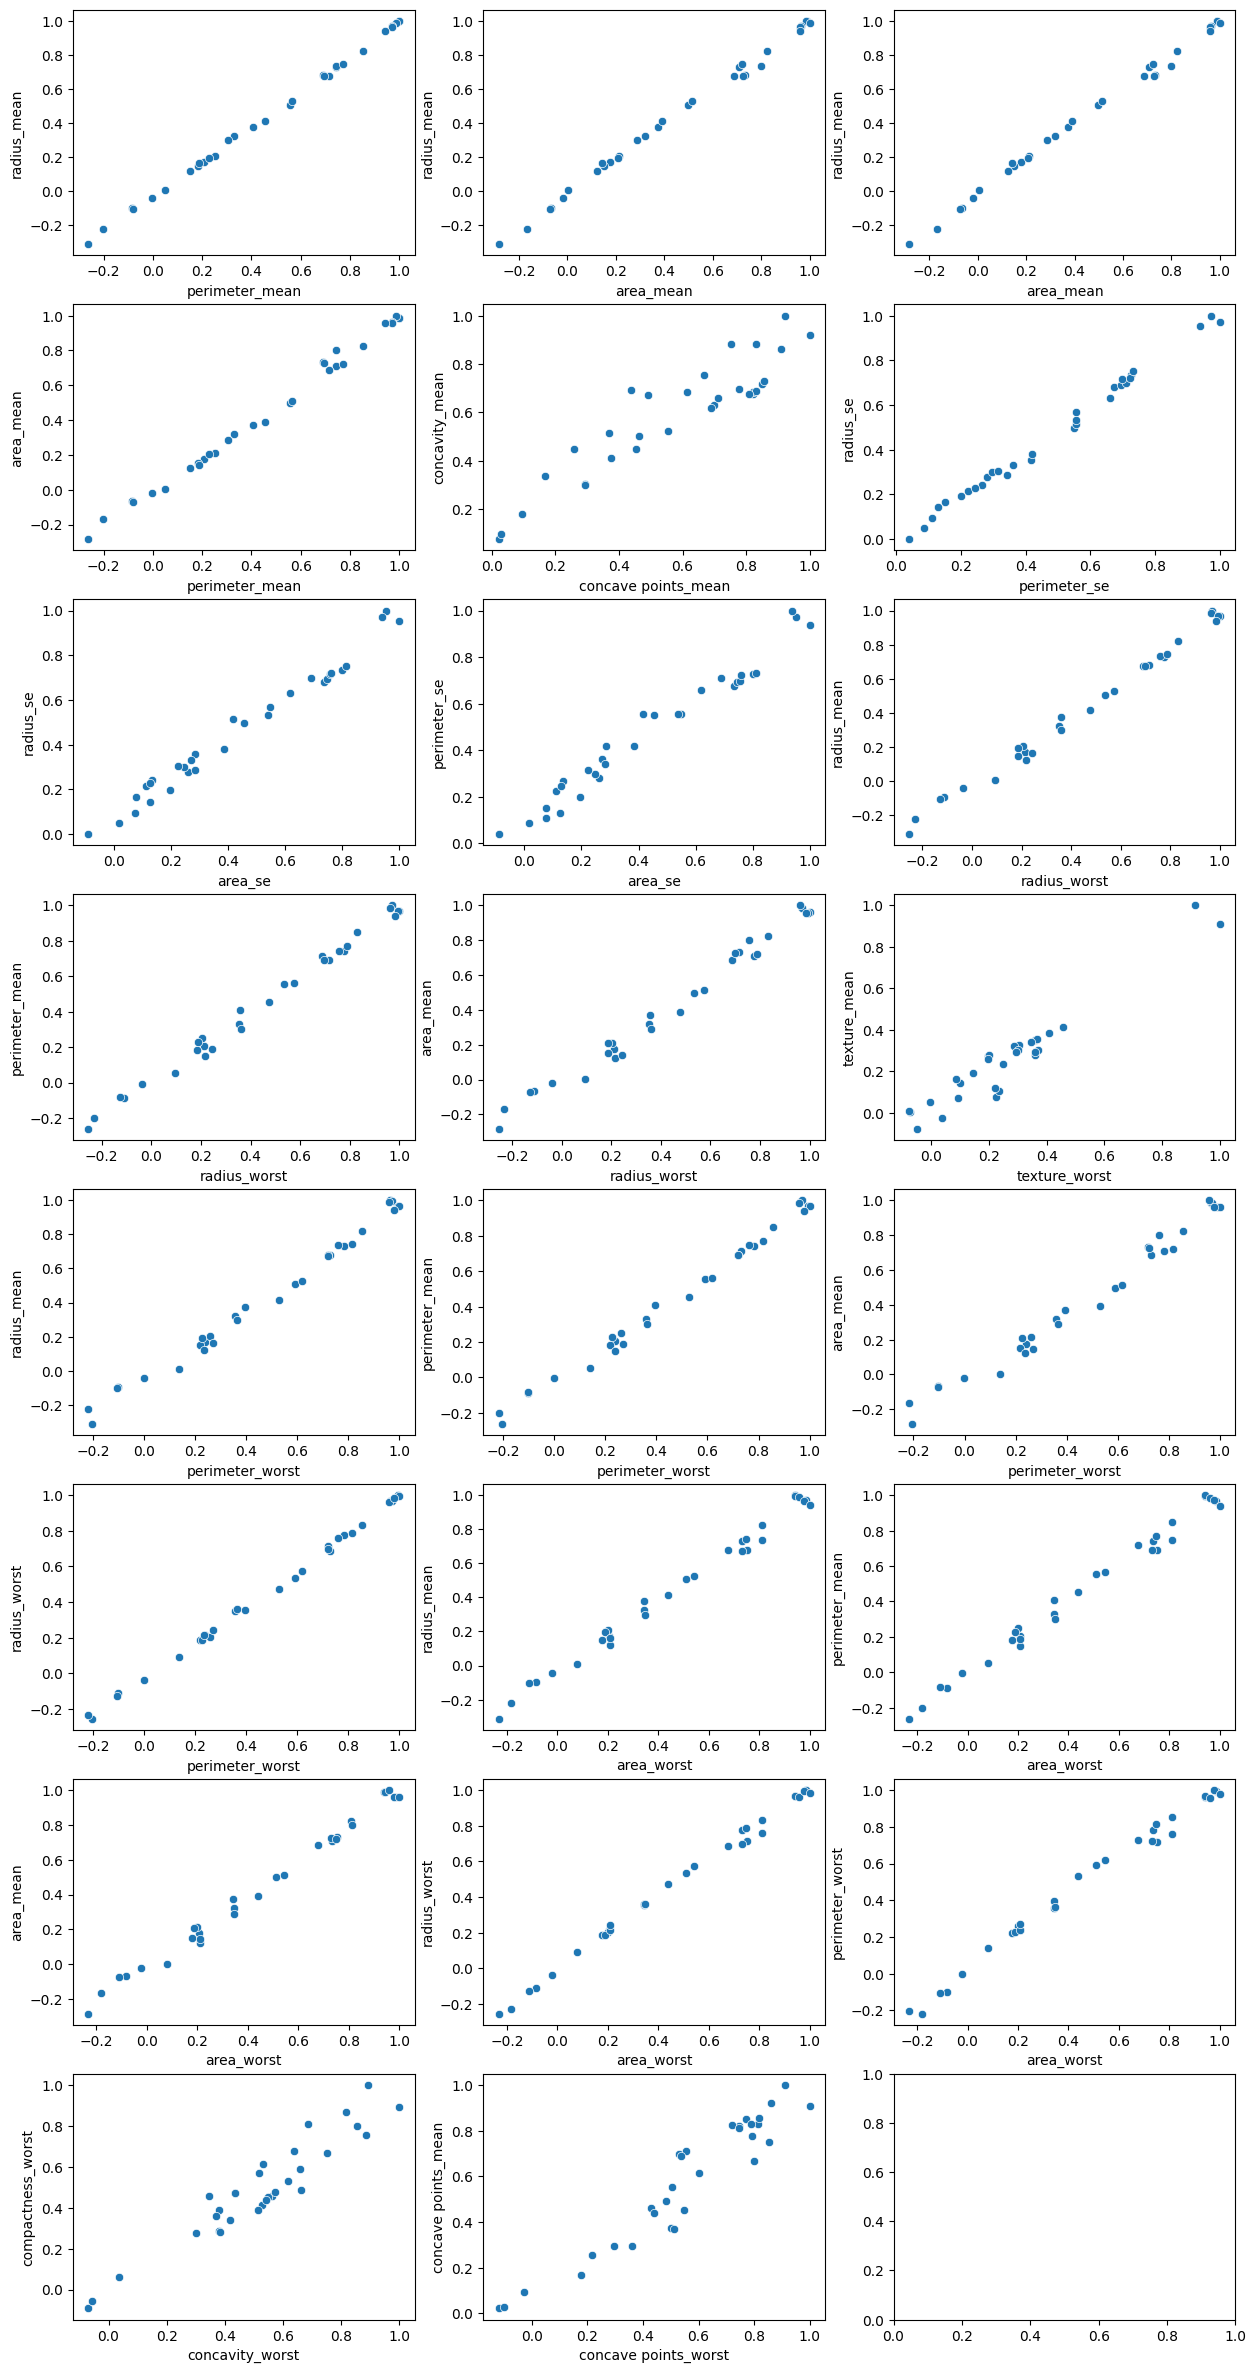

In [20]:
fig, axs = plt.subplots(8, 3, figsize=(15, 30))

sns.scatterplot(df_corr, x = 'perimeter_mean', y = 'radius_mean', ax = axs[0,0])
sns.scatterplot(df_corr, x = 'area_mean', y = 'radius_mean', ax = axs[0,1])
sns.scatterplot(df_corr, x = 'area_mean', y = 'radius_mean', ax = axs[0,2])
sns.scatterplot(df_corr, x = 'perimeter_mean', y = 'area_mean', ax = axs[1,0])
sns.scatterplot(df_corr, x = 'concave points_mean', y = 'concavity_mean', ax = axs[1,1])
sns.scatterplot(df_corr, x = 'perimeter_se', y = 'radius_se', ax = axs[1,2])
sns.scatterplot(df_corr, x = 'area_se', y = 'radius_se', ax = axs[2,0])
sns.scatterplot(df_corr, x = 'area_se', y = 'perimeter_se', ax = axs[2,1])
sns.scatterplot(df_corr, x = 'radius_worst', y = 'radius_mean', ax = axs[2,2])
sns.scatterplot(df_corr, x = 'radius_worst', y = 'perimeter_mean', ax = axs[3,0])
sns.scatterplot(df_corr, x = 'radius_worst', y = 'area_mean', ax = axs[3,1])
sns.scatterplot(df_corr, x = 'texture_worst', y = 'texture_mean', ax = axs[3,2])
sns.scatterplot(df_corr, x = 'perimeter_worst', y = 'radius_mean', ax = axs[4,0])
sns.scatterplot(df_corr, x = 'perimeter_worst', y = 'perimeter_mean', ax = axs[4,1])
sns.scatterplot(df_corr, x = 'perimeter_worst', y = 'area_mean', ax = axs[4,2])
sns.scatterplot(df_corr, x = 'perimeter_worst', y = 'radius_worst', ax = axs[5,0])
sns.scatterplot(df_corr, x = 'area_worst', y = 'radius_mean', ax = axs[5,1])
sns.scatterplot(df_corr, x = 'area_worst', y = 'perimeter_mean', ax = axs[5,2])
sns.scatterplot(df_corr, x = 'area_worst', y = 'area_mean', ax = axs[6,0])
sns.scatterplot(df_corr, x = 'area_worst', y = 'radius_worst', ax = axs[6,1])
sns.scatterplot(df_corr, x = 'area_worst', y = 'perimeter_worst', ax = axs[6,2])
sns.scatterplot(df_corr, x = 'concavity_worst', y = 'compactness_worst', ax = axs[7,0])
sns.scatterplot(df_corr, x = 'concave points_worst', y = 'concave points_mean', ax = axs[7,1])

plt.show();

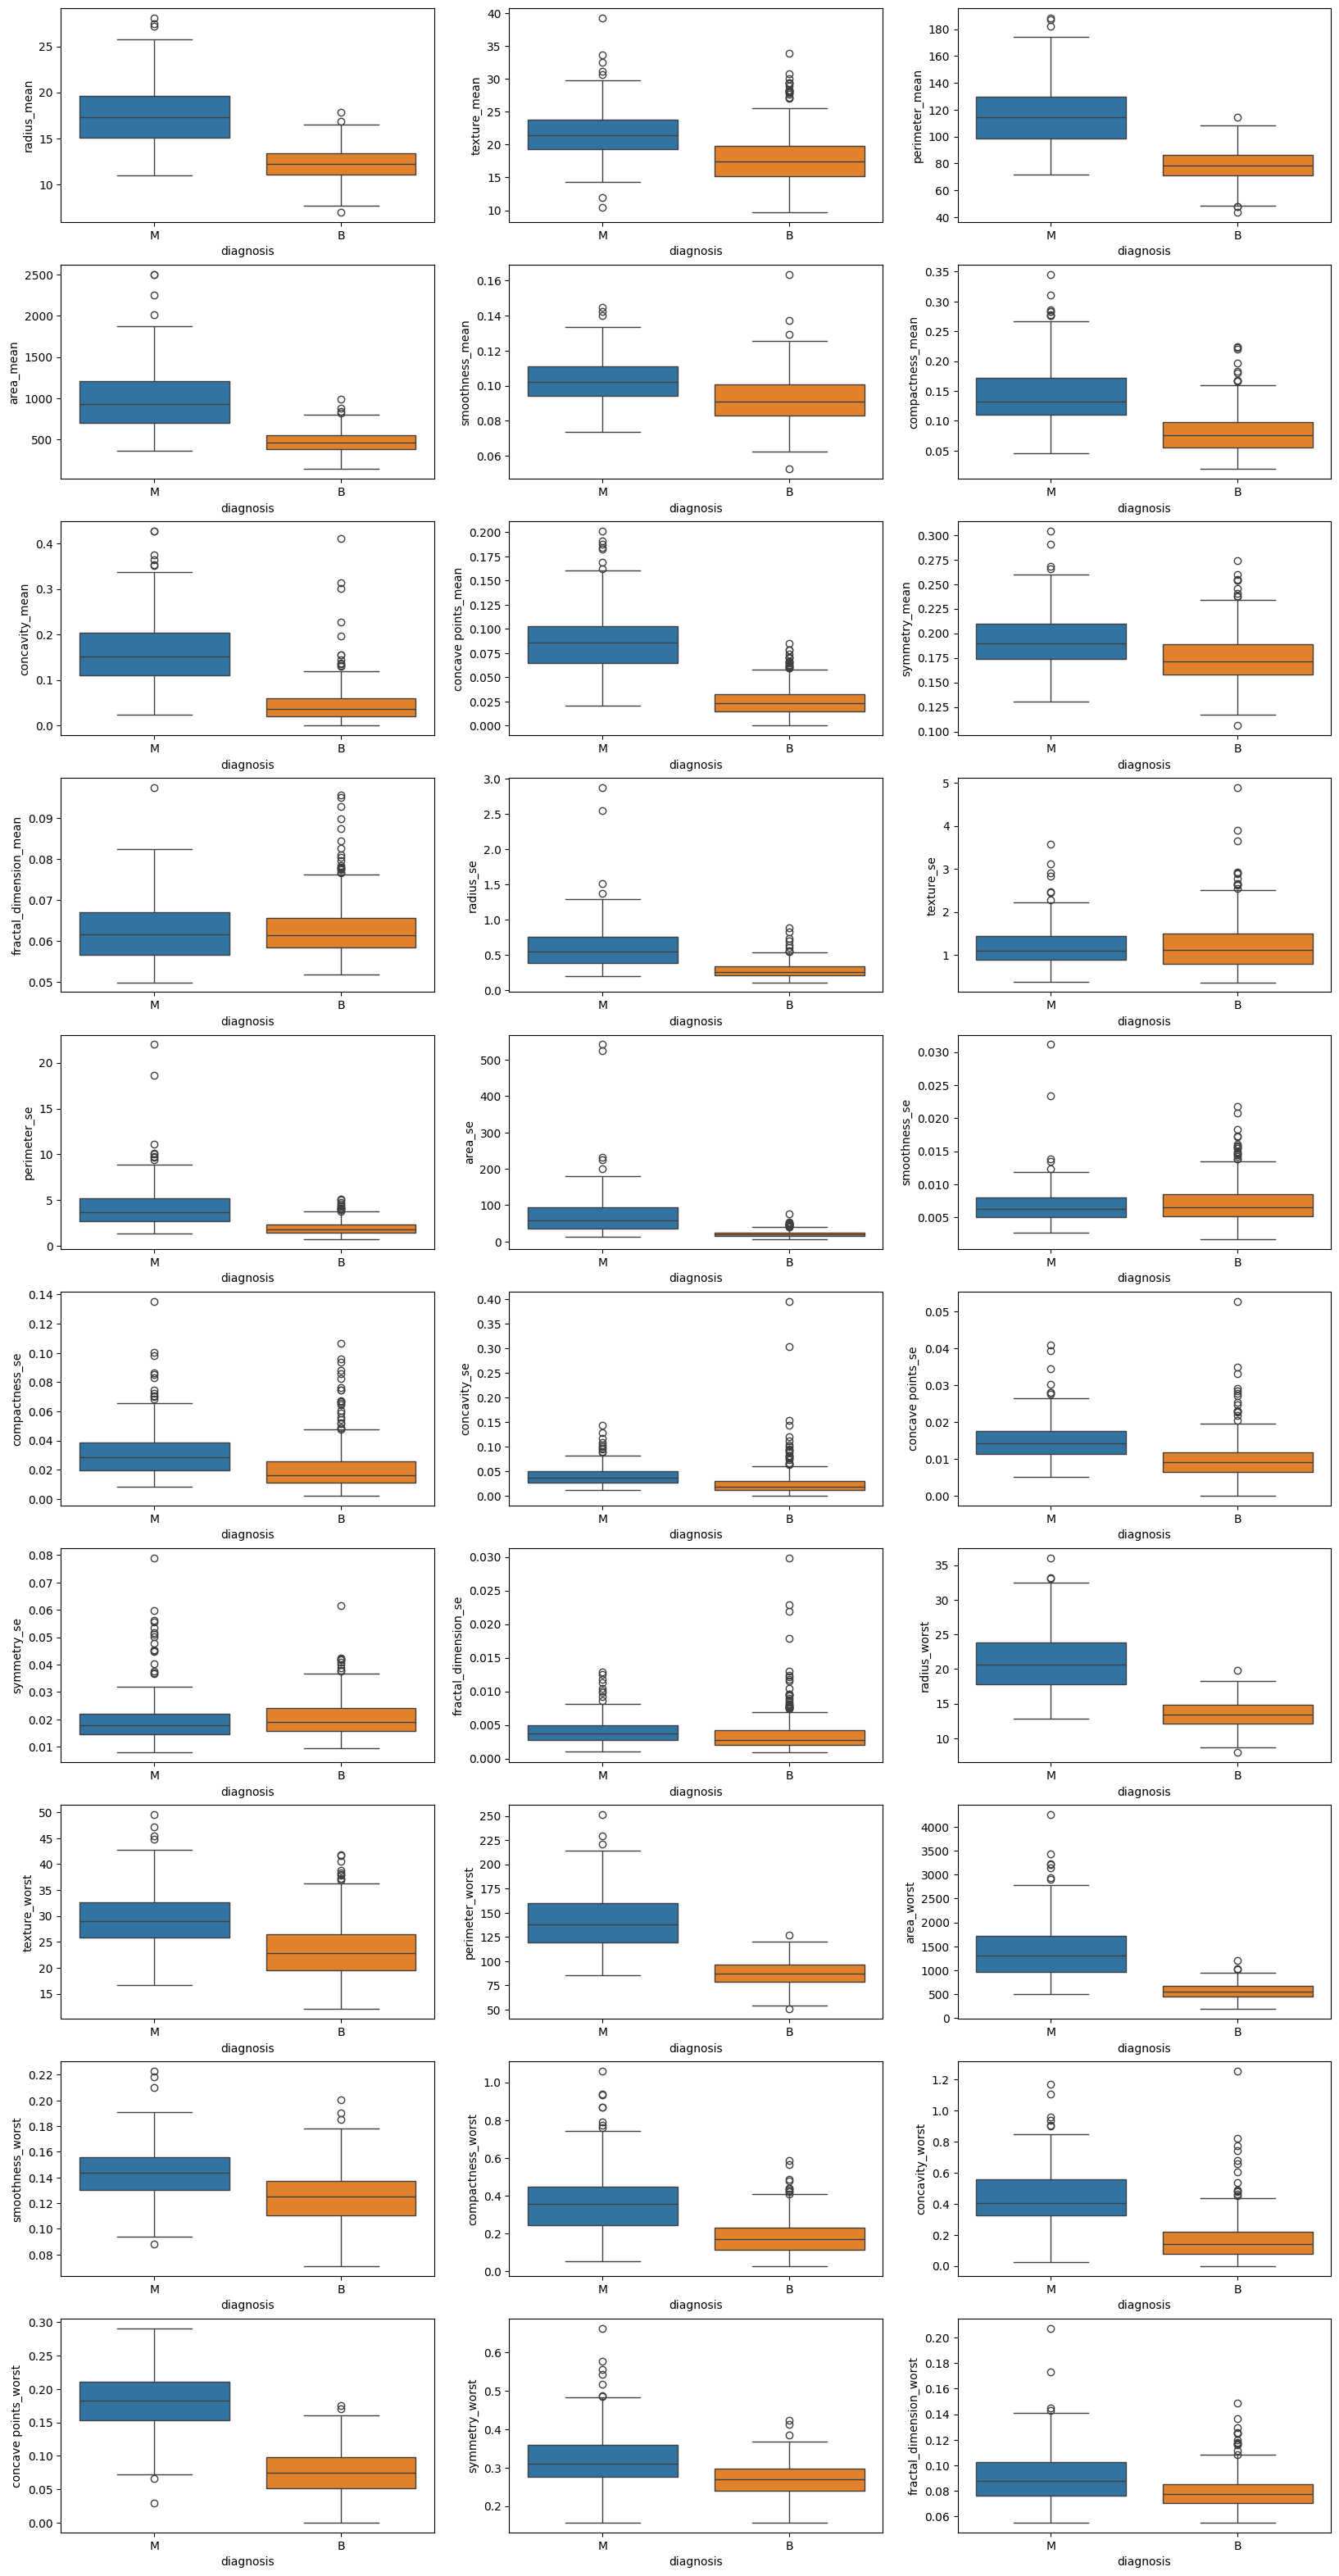

In [21]:
fig, axs = plt.subplots(10, 3, figsize=(20, 40))

columns = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 
           'smoothness_mean', 'compactness_mean', 'concavity_mean', 
           'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
           'radius_se', 'texture_se', 'perimeter_se', 'area_se', 
           'smoothness_se', 'compactness_se', 'concavity_se', 
           'concave points_se', 'symmetry_se', 'fractal_dimension_se',
           'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 
           'smoothness_worst', 'compactness_worst', 'concavity_worst', 
           'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

for i, col in enumerate(columns):
    row = i // 3
    col_idx = i % 3
    sns.boxplot(data=df, x='diagnosis', y=col, hue='diagnosis', ax=axs[row, col_idx])

plt.show()

In [24]:
df.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [79]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [30]:
df['diagnosis'] = df['diagnosis'].apply(lambda x:1 if x=='M' else 0)
df.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [62]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['diagnosis'], axis=1), df['diagnosis'], test_size=0.2, random_state=52, stratify=df['diagnosis']
)

In [63]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [64]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
X_train_scaled.shape

(455, 30)

In [83]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
preds = knn.predict(X_test_scaled)
preds.shape

(114,)

In [78]:
accuracy = accuracy_score(preds, y_test)
precision = precision_score(preds, y_test)
recall = recall_score(preds, y_test)
f1 = f1_score(preds, y_test)
print("Accuracy:    {:.3f}\nPrecision:    {:.3f}\nRecal:    {:.3f}\nF1-Score:    {:.3f}".format(accuracy, precision, recall, f1))

Accuracy:    0.982
Precision:    1.000
Recal:    0.955
F1-Score:    0.977


In [80]:
auc = roc_auc_score(y_test, preds)
print("ROC-AUC:", auc)

ROC-AUC: 0.986111111111111


In [81]:
fpr, tpr, thresholds = roc_curve(y_test, preds)

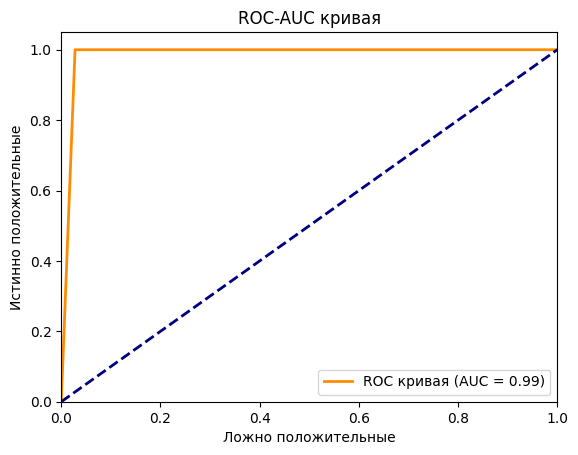

In [82]:
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC кривая (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ложно положительные')
plt.ylabel('Истинно положительные')
plt.title('ROC-AUC кривая')
plt.legend(loc="lower right")
plt.show()

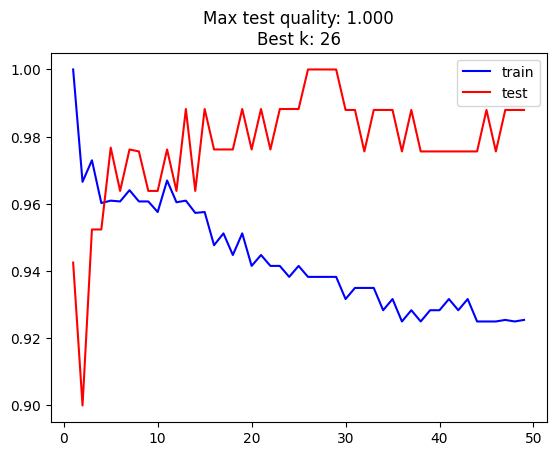

In [85]:
neighbors = range(1, 50)
f1_score_train = []
f1_score_test = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    f1_score_train.append(f1_score(knn.predict(X_train_scaled), y_train))
    f1_score_test.append(f1_score(knn.predict(X_test_scaled), y_test))
    
plt.plot(neighbors, f1_score_train, color='blue', label='train')
plt.plot(neighbors, f1_score_test, color='red', label='test')
plt.title("Max test quality: {:.3f}\nBest k: {}".format(max(f1_score_test), np.argmax(f1_score_test)+1))
plt.legend();

In [84]:
from sklearn.model_selection import GridSearchCV

# параметр p отвечает за выбор метрики расстояния
param_grid = {
        'n_neighbors': range(1, 50),
        'p': range(1, 4)
}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1', verbose=1)
grid_search.fit(X_train_scaled, y_train)

print("Best CV score: {:.3f}, best CV k: {}".format(
    grid_search.best_score_, grid_search.best_estimator_.n_neighbors)
) 


test_predictions = grid_search.best_estimator_.predict(X_test_scaled)
print("Resulting test score: {:.3f}".format(f1_score(test_predictions, y_test)))

Fitting 5 folds for each of 147 candidates, totalling 735 fits
Best CV score: 0.958, best CV k: 5
Resulting test score: 0.977
